## Exercise 2

Machine learning and data visualization strategies generally work best on data that is numeric, but exercise 1 gave us text data, and indeed text is common. Fortunately, modern NLP algorithms powered by machine learning trained on massive datasets exist that can take words (e.g. word2vec) or titles and abstracts (e.g. SPECTER) and return a vector of numbers in a way that similar items are given similar vectors. Since we have titles and abstracts, let's use SPECTER.

In particular, for each paper identified from exercise 1, compute the SPECTER embedding (a 768-dimensional vector). Keep track of which papers came from searching for Alzheimers, which came from searching for cancer. (5 points) If you are familiar with SPECTER and wish to do it another way, that's great, if not here's one approach based on https://github.com/allenai/specter:

Install pytorch (a deep learning library) by following the instructions here: https://pytorch.org/get-started/locally/

Install the huggingface transformers module: pip install transformers

(🤗 huggingface provides access to a number of pre-trained NLP language models.)

Have your code load the SPECTER model (the first time you do this, it will take a bit to download the model; it will be stored locally for fast reuse later):

Load the papers dictionary (3 points) and then process your dictionary of papers to find the SPECTER embeddings (2 points). One (somewhat slow) way to do this is as follows:

At this point, embeddings[i] is the 768-dim vector for the ith paper.

Apply principal component analysis (PCA) to identify the first three principal components. (5 points) I suggest using the sklearn module, e.g.

Plot 2D scatter plots for PC0 vs PC1, PC0 vs PC2, and PC1 vs PC2; color code these by the search query used (Alzheimers vs cancer). (5 points) Comment on the separation or lack thereof, and any take-aways from that. (5 points)

## Response

In [181]:
#download transformers using conda in terminal
!conda install -c huggingface transformers -y

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    huggingface_hub-0.10.1     |             py_0         160 KB  huggingface
    sacremoses-master          |             py_0         404 KB  huggingface
    tokenizers-0.13.0.dev0     |           py39_0         3.3 MB  huggingface
    transformers-4.24.0        |             py_0         2.6 MB  huggingface
    ------------------------------------------------------------
                      

In [115]:
pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [116]:
# import AutoTokenizer, AutoModel.
from transformers import AutoTokenizer, AutoModel

# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
model = AutoModel.from_pretrained('allenai/specter')

In [117]:
# importing tools

import json
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib as plt
import seaborn as sns

In [118]:
# Loading the Alzheimers paper set file 

with open("Alzheimer.json") as f:
    alzheimers_metadata = json.load(f)

alzheimer_df = pd.DataFrame.from_dict(alzheimers_metadata, orient = 'index') 
alzheimer_df.head()

,ArticleTitle,ArticleAbstract,Query,Mesh
36315115,Association of Stroke and Cerebrovascular Path...,Scam susceptibility is associated with adverse...,Alzheimers,[]
36314730,Cerebrospinal fluid neurofilament light and ce...,Neurodegeneration underpins the pathological p...,Alzheimers,[]
36314503,Improving community health-care systems' early...,Preliminary estimates suggest that current glo...,Alzheimers,[]
36314232,Erratum to: Predictors of Life Expectancy in A...,,Alzheimers,[]
36314212,The Ethics of Using Caregivers as Cognitive Te...,O'Caoimh et al. demonstrated that caregivers o...,Alzheimers,[]


In [119]:
# Loading the Cancer paper set file 

with open("Cancer.json") as f:
    cancer_metadata = json.load(f)

cancer_df = pd.DataFrame.from_dict(cancer_metadata, orient = 'index') 
cancer_df.head()

,ArticleTitle,ArticleAbstract,Query,Mesh
36316114,Apatinib as a Third-Line Treatment for HER2-Po...,Treatment options are limited after the failur...,Cancer,[]
36316113,Safe Discharge Criteria After Curative Gastrec...,This study aimed to investigate the relationsh...,Cancer,[]
36316112,Endoscopic Findings and Treatment of Gastric N...,Gastric neoplasia is a common manifestation of...,Cancer,[]
36316111,Tumor Location Causes Different Recurrence Pat...,Tumor recurrence is the principal cause of poo...,Cancer,[]
36316110,PLK2 Single Nucleotide Variant in Gastric Canc...,Chromosomal instability is a hallmark of gastr...,Cancer,[]


In [142]:
combined_papers = pd.concat([alzheimer_df,cancer_df])

In [143]:
combined_papers

,ArticleTitle,ArticleAbstract,Query,Mesh
36315115,Association of Stroke and Cerebrovascular Path...,Scam susceptibility is associated with adverse...,Alzheimers,[]
36314730,Cerebrospinal fluid neurofilament light and ce...,Neurodegeneration underpins the pathological p...,Alzheimers,[]
36314503,Improving community health-care systems' early...,Preliminary estimates suggest that current glo...,Alzheimers,[]
36314232,Erratum to: Predictors of Life Expectancy in A...,,Alzheimers,[]
36314212,The Ethics of Using Caregivers as Cognitive Te...,O'Caoimh et al. demonstrated that caregivers o...,Alzheimers,[]
...,...,...,...,...
36308179,Molecular subtypes of invasive breast carcinom...,"Tumor budding (TB), poorly differentiated clus...",Cancer,"[Humans, Female, Retrospective Studies, Recept..."
36308083,Efficacy and safety of EUS-guided gallbladder ...,ERCP is the first line of treatment for malign...,Cancer,[]
36308082,Forkhead Box S1 inhibits the progression of lu...,Lung squamous cell carcinoma (SCC) is consider...,Cancer,"[Mice, Animals, Wnt Signaling Pathway, beta Ca..."
36308081,ZNF561 antisense RNA 1 contributes to angiogen...,Hepatocellular carcinoma is a common malignant...,Cancer,"[Humans, Carcinoma, Hepatocellular, RNA, Antis..."


In [154]:
# Loading the Combined paper set file : includes paper from Alzheimers and Cancer disease 

with open('papers.json') as f:
    combined_data = json.load(f)

In [158]:
# Computing the SPECTER embedding 

data = [paper["ArticleTitle"] + tokenizer.sep_token + paper["ArticleAbstract"] for paper in combined_data.values()]
inputs = tokenizer([data[0]], padding=True, truncation=True, return_tensors="pt", max_length=512)
result = model(**inputs)
embeddings_total = result.last_hidden_state[:, 0, :].detach().numpy()

for i in range(1,len(data)):
    inputs = tokenizer([data[i]], padding=True, truncation=True, return_tensors="pt", max_length=512)
    result = model(**inputs)
    embeddings = result.last_hidden_state[:, 0, :].detach().numpy()
    embeddings_total = np.concatenate((embeddings_total, embeddings),axis = 0)

In [159]:
# Applying principal component analysis (PCA) to identify the first three principal components

pca = decomposition.PCA(n_components=3)
embeddings_pca = pd.DataFrame(pca.fit_transform(embeddings_total),columns=['PC0', 'PC1', 'PC2'])
embeddings_pca["Query"] = [paper["Query"] for paper in combined_data.values()]

In [160]:
embeddings_pca

,PC0,PC1,PC2,Query
0,-4.678195,3.000064,3.983280,Alzheimers
1,-5.506620,1.476830,3.631659,Alzheimers
2,-7.132979,3.150683,3.925214,Alzheimers
3,-5.904363,2.459445,2.852544,Alzheimers
4,-5.359968,-0.412834,-0.422238,Alzheimers
...,...,...,...,...
1994,8.653900,-2.024786,-1.850365,Cancer
1995,5.899750,6.154752,3.499627,Cancer
1996,3.180859,0.754004,-2.725007,Cancer
1997,2.865486,-0.261790,-6.288406,Cancer


#### Plotting the 2D scatter plots for PC0 vs PC1, PC0 vs PC2, and PC1 vs PC2; color code these by the search query used (Alzheimers vs cancer.

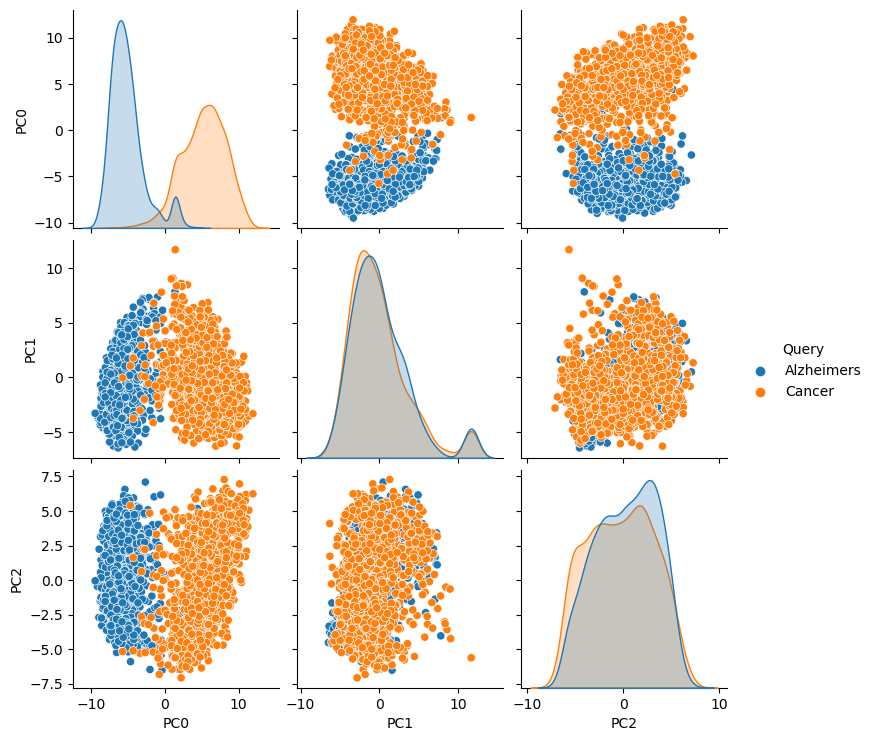

In [180]:
sns.pairplot(embeddings_pca, hue = 'Query')
plt.show()

### Findings : 

 - Principal Component Analysis (PCA) is a linear methods used for dimensionality reduction.
 - PCA seeks to build a small-dimensional coordinate system using whatever small collection of components (i.e. combinations of variables) best explains the variability of the underlying dataset, and then simply throw out the coordinates which do not have a high impact on variation.
 - Scatter plot for PC0 vs PC1 using PCA method : the variation (separation) is clearly visible. The first principal component is the linear combination of x-variables that has maximum variance (among all linear combinations). It accounts for as much variation in the data as possible. When the two queries datset is projected to a two-dimensional space, can be linearly separable up to some extent.
 - Scatter plot for PC0 vs PC2 using PCA method : Similarly to PC0 vs PC1, PC0 vs PC2 we can notice the separatability from the two diseases datasets.When the two queries datset is projected to a two-dimensional space, can be linearly separable up to some extent.
 - Scatter plot for PC1 vs PC2 using PCA method : Datasets are not linearly separable across PC1 and PC2.
 - Most of the variability in the data is captured by PC0 (Principal Component 0) and the residual variability is captured by PC1 (Principal Component 1), which is orthogonal (independent) to PC0 and PC2 (Principal Component 2), which is orthogonal (independent) to PC1.  PC1 and PC2 tries to capture the abnormal variations in the dataset. PC1 and PC2 have 0 correlation.